In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, f1_score

In [2]:
dataset = pd.read_csv("spam_email_dataset.csv")

In [3]:
dataset

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,cassidytaylor@example.com,Current team yet like realize American.,martinezangela@example.net,perkinsmatthew@example.org,10-04-2023,07:18,1,7,114,83,0,3,2,0,5,0
5996,lisatate@example.com,Also start certainly range great try others.,mckenzieerika@example.net,jeremy75@example.org,07-05-2023,19:45,1,5,19,10,0,0,1,7,0,0
5997,cassandravazquez@example.org,Matter issue win agent likely.,dlewis@example.org,cervanteskimberly@example.org,08-04-2023,18:49,2,10,52,45,5,3,0,10,4,0
5998,amoore@example.com,Again member father.,eperry@example.org,dana02@example.org,19-01-2023,14:00,3,2,178,76,0,1,2,11,1,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Email              6000 non-null   object
 1   Subject            6000 non-null   object
 2   Sender             6000 non-null   object
 3   Recipient          6000 non-null   object
 4   Date               6000 non-null   object
 5   Time               6000 non-null   object
 6   Attachments        6000 non-null   int64 
 7   Link Count         6000 non-null   int64 
 8   Word Count         6000 non-null   int64 
 9   Uppercase Count    6000 non-null   int64 
 10  Exclamation Count  6000 non-null   int64 
 11  Question Count     6000 non-null   int64 
 12  Dollar Count       6000 non-null   int64 
 13  Punctuation Count  6000 non-null   int64 
 14  HTML Tags Count    6000 non-null   int64 
 15  Spam Indicator     6000 non-null   int64 
dtypes: int64(10), object(6)
memory usage: 750.

In [5]:
dataset = dataset.select_dtypes(include="int64")
dataset

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,3,0,191,32,3,3,0,11,1,1
1,3,9,45,1,2,1,2,8,2,1
2,3,9,52,1,4,0,2,10,1,1
3,2,3,75,6,0,2,0,8,2,0
4,3,5,299,279,0,2,0,6,1,1
...,...,...,...,...,...,...,...,...,...,...
5995,1,7,114,83,0,3,2,0,5,0
5996,1,5,19,10,0,0,1,7,0,0
5997,2,10,52,45,5,3,0,10,4,0
5998,3,2,178,76,0,1,2,11,1,1


# count_unique:
It counts the unique or different items in each column and gives you those counts for all the columns in your dataset. It's useful for understanding how varied or diverse the data is in each category.

In [6]:
dataset.nunique()

Attachments            4
Link Count            11
Word Count           291
Uppercase Count      284
Exclamation Count      6
Question Count         4
Dollar Count           3
Punctuation Count     16
HTML Tags Count        6
Spam Indicator         2
dtype: int64

In [7]:
Cat_var = ['Attachments','Link Count','Exclamation Count','Question Count','Dollar Count','Punctuation Count','HTML Tags Count']

# Count plot (catagorical variable vs Spam Indicator):
Visualization helps analyze how different categorical variables relate to the 'Spam Indicator' in the dataset.

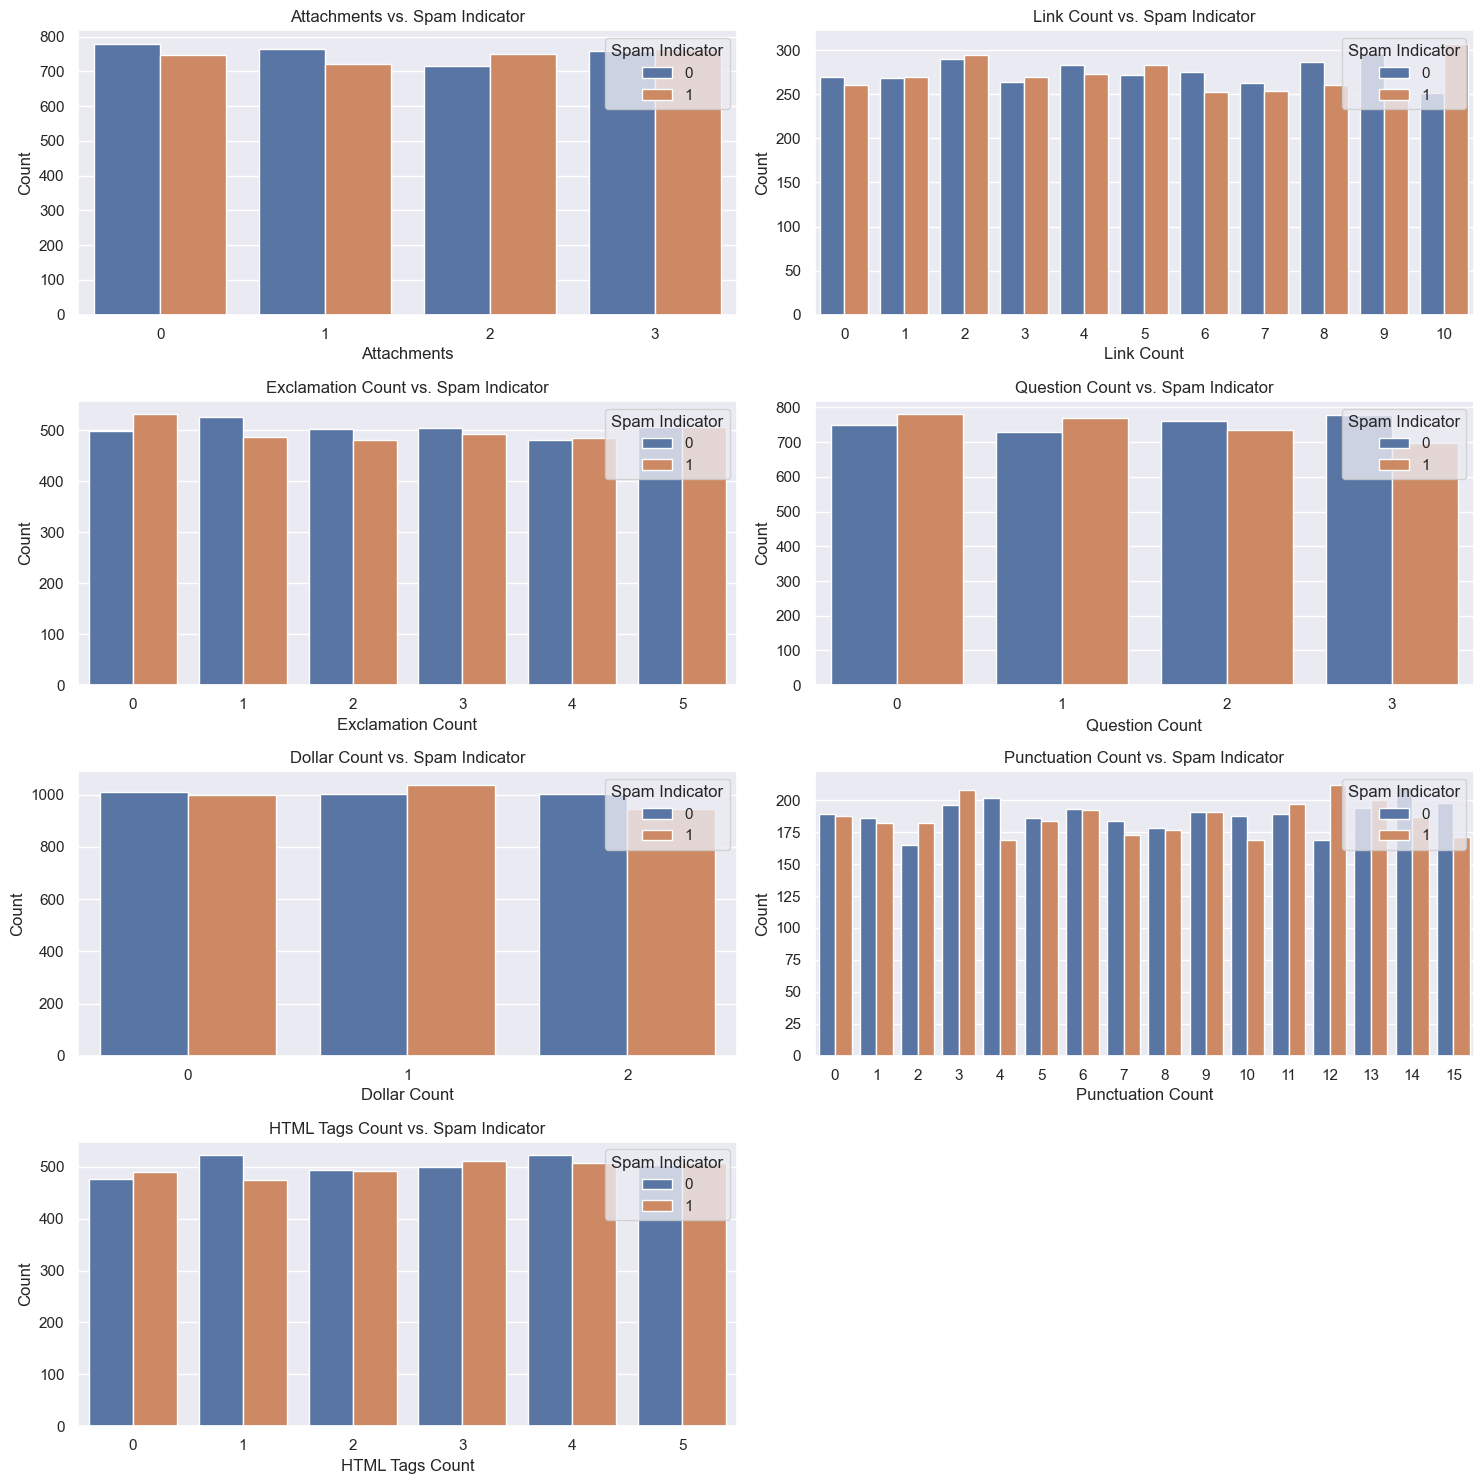

In [8]:
sns.set()
# Calculate the number of rows and columns for subplots
num_vars = len(Cat_var)
num_cols = 2
num_rows = (num_vars + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes if there is only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Loop through the categorical variables and create countplots
for i, var in enumerate(Cat_var):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.countplot(data=dataset, x=var, hue='Spam Indicator', ax=ax)
    ax.set_title(f'{var} vs. Spam Indicator')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')

# Remove any empty subplots
if num_vars % num_cols != 0:
    for i in range(num_vars, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

# Pia Plot of catagorical variable:
    It show the percentage of each catagory in catagorical variable using pia chart.
    This visualization helps analyze the composition of each categorical variable in the dataset, showing how the categories are distributed.

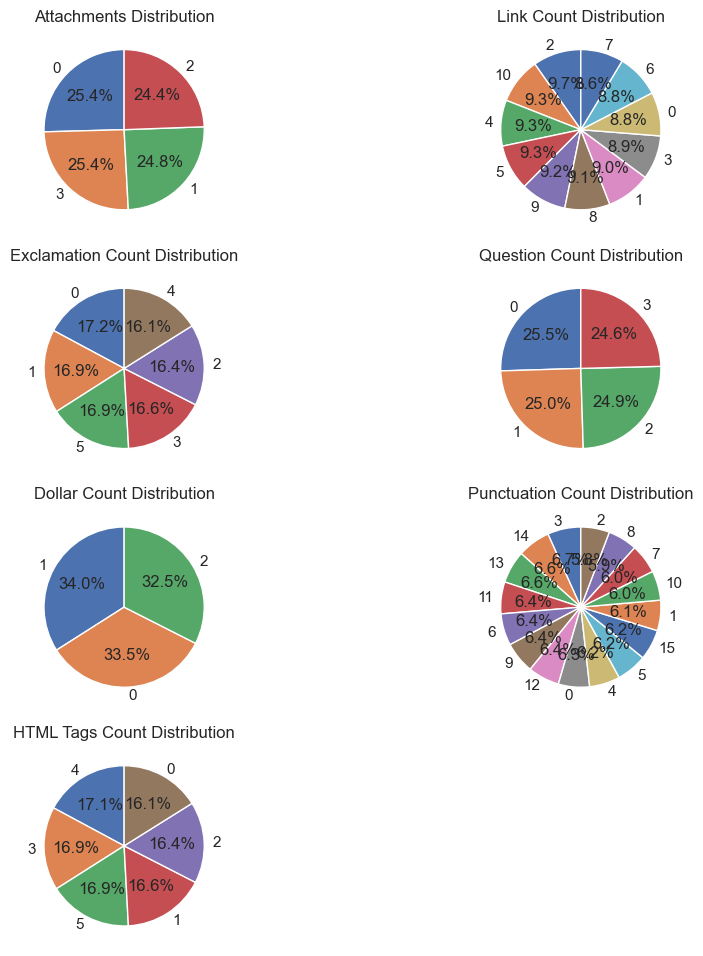

In [9]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(Cat_var)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through categorical variables and create countplots
for i, var in enumerate(Cat_var):
    if i < len(axs):
        ax = axs[i]
        cat_counts = dataset[var].value_counts()
        ax.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{var} Distribution')
    
# Adjust spacing between subplots
fig.tight_layout()

# If there's an extra subplot that needs to be removed
if len(axs) > num_cat_vars:
    fig.delaxes(axs[-1])

# Show the plot
plt.show()

# working with Numarical variables:
It display information about the distribution, including the median, quartiles, and potential outliers. The boxplots allow you to visually analyze the spread and central tendency of each numerical variable in the dataset

In [10]:
num_vars = ['Word Count', 'Uppercase Count']

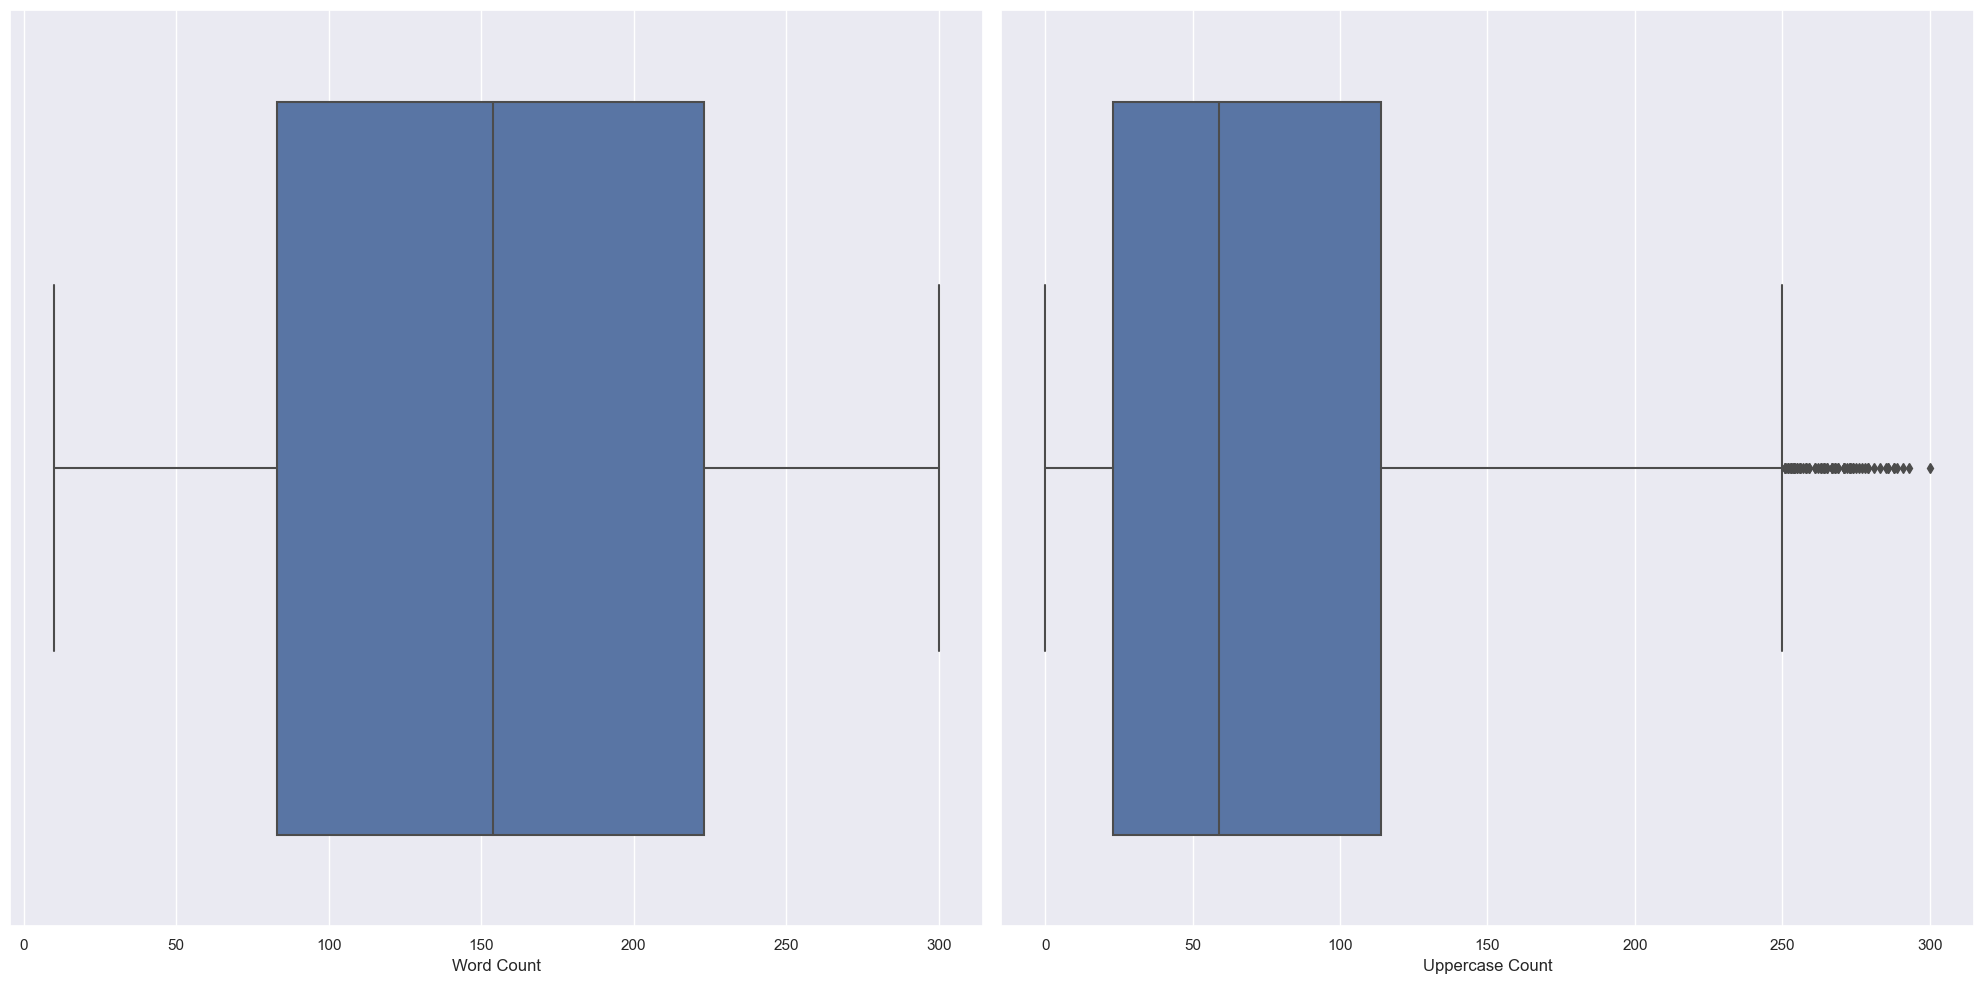

In [11]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(num_vars)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var,data=dataset, ax=axs[i])
    
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

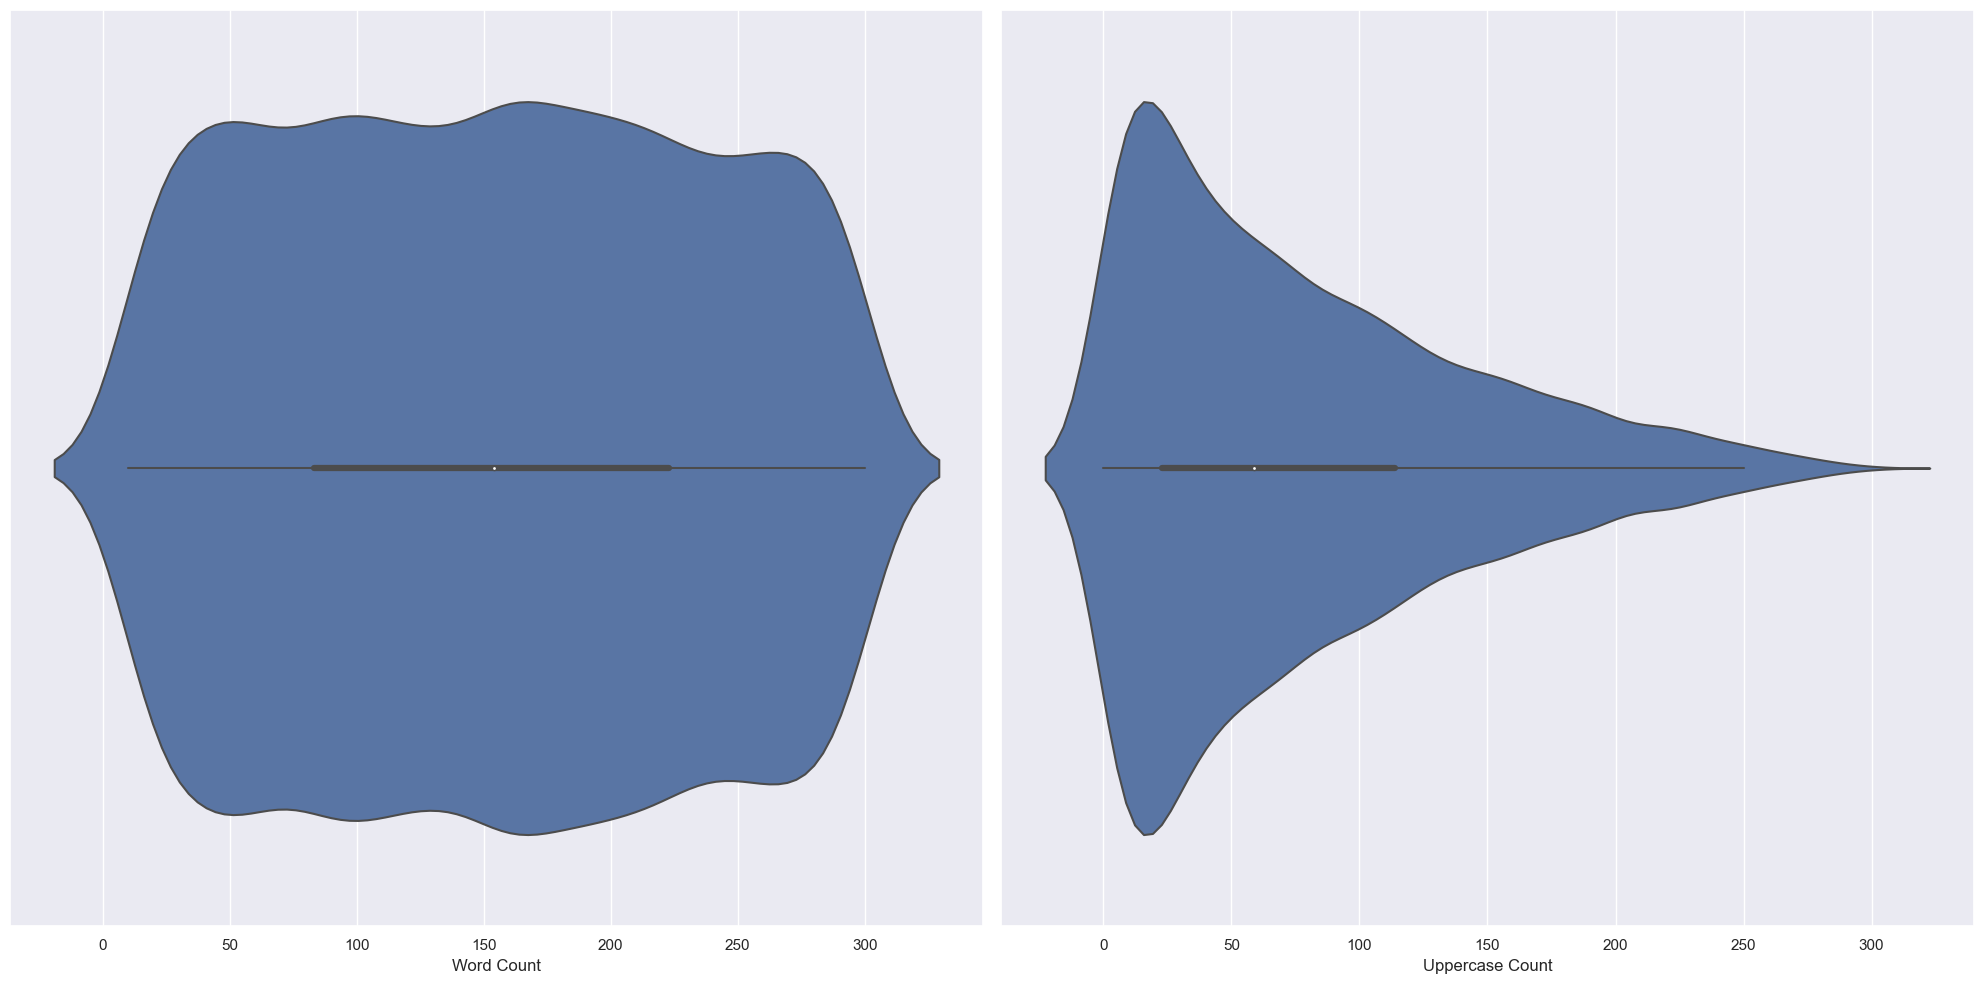

In [12]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(num_vars)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var,data=dataset, ax=axs[i])
    
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

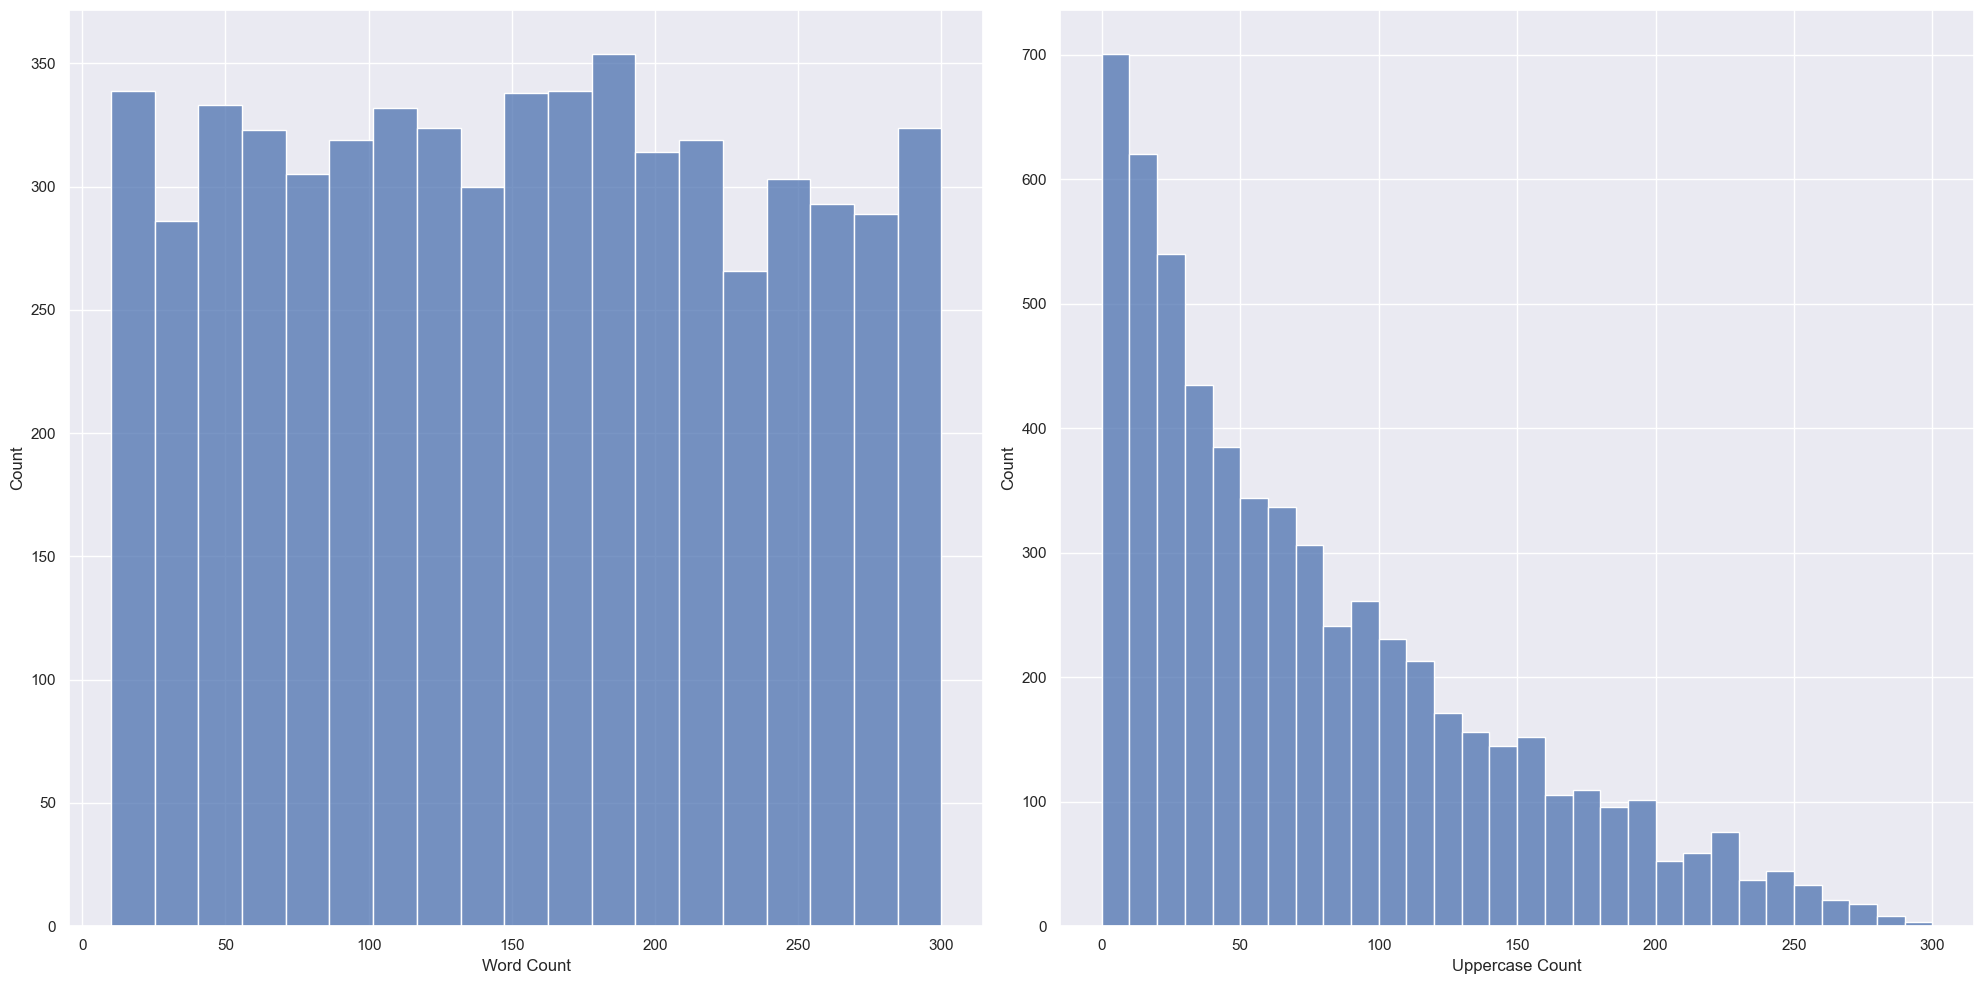

In [13]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(num_vars)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var,data=dataset, ax=axs[i])
    
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# Corelation Between Columns using Heatmap:
The resulting heatmap provides a visual representation of how variables in the DataFrame x are correlated with each other. Positive correlations are typically represented with warmer colors (e.g., red), while negative correlations are represented with cooler colors (e.g., blue). This visualization helps in identifying relationships and dependencies between variables.

<Axes: >

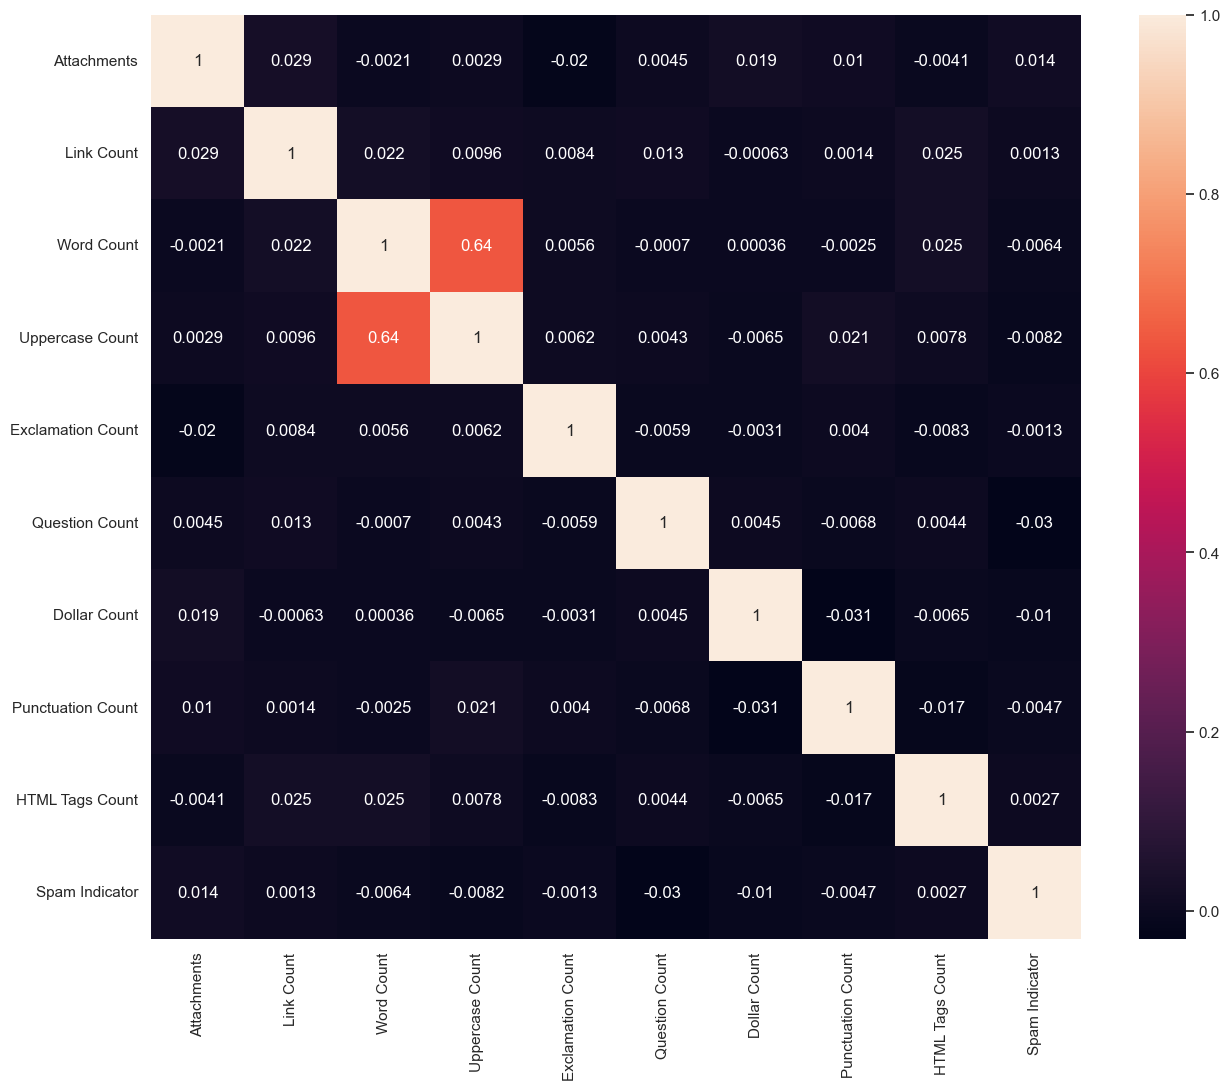

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(dataset.corr(),fmt='.2g',annot=True)

# Selecting Dependent and Independent Variable:

In [15]:
y = dataset[['Spam Indicator']]

In [20]:
x = dataset.drop(columns = 'Spam Indicator')


In [21]:
#x = x.drop(columns = 'Word Count')

In [22]:
#x = x.drop(columns = 'Uppercase Count')

In [23]:
x.head()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count
0,3,0,191,32,3,3,0,11,1
1,3,9,45,1,2,1,2,8,2
2,3,9,52,1,4,0,2,10,1
3,2,3,75,6,0,2,0,8,2
4,3,5,299,279,0,2,0,6,1


In [24]:
y.head()

,Spam Indicator
0,1
1,1
2,1
3,0
4,1


# train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Training Model (Random Forest)

In [26]:
model = RandomForestClassifier()

In [27]:
model.fit(x_train, y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6728\940050797.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier()

In [28]:
y_pred = model.predict(x_test)

In [29]:
 # Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[169 133]
 [161 137]]


In [30]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.51


In [31]:
# Calculate precision score

precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)

Precision Score: 0.5074074074074074


In [32]:
# Calculate recall score
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

Recall Score: 0.4597315436241611


In [33]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.4823943661971831


In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model_l = LogisticRegression()

In [36]:
model_l.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred_l = model.predict(x_test)

In [38]:
 # Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_l)
# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[169 133]
 [161 137]]


In [39]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.51
